### **Dataset Name**:
Life Expectancy (WHO)

### **Source**:
[Kaggle Link (Life Expectancy WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

### **Number of Rows**:
2,938

### **Number of Columns**:
22

### **Target Variable**:
Life expectancy (Continuous)

### **Problem Type**:
Regression

### **Dataset Suitability**:
This dataset aggregates health factors for 193 countries over 15 years. With **22 columns**, it easily meets the complexity requirements. It presents a unique challenge compared to the previous datasets: it contains significant **missing values** in columns like `Hepatitis B` and `GDP`, and includes both categorical data (`Country`, `Status`) and numerical health metrics (`Polio`, `BMI`, `HIV/AIDS`). This allows us to demonstrate how Imputation and Encoding are critical for analyzing real-world health data.

## **Step 1:** Dataset Collection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ML_Project/Datasets/Raw/Life Expectancy Data.csv")

# Clean column names (They have extra spaces like " BMI " which cause errors)
df.columns = df.columns.str.strip()

# Inspect
print(f"Shape: {df.shape}")
print(df.isnull().sum()) # Notice high missing values in Hepatitis B, GDP, Population

Mounted at /content/drive
Shape: (2938, 22)
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


## **Step 2:** Data Preprocessing


In [2]:

# 1. Handle Missing Values (The most important step here)
# Fill numerical columns with the Mean (average) of that column
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 2. Encode Categorical Columns
# 'Status' (Developed/Developing) -> Binary
# 'Country' -> Label Encoding (One-Hot would create 193 columns, which is too many)
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

# 3. Split and Scale
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Complete.")

Preprocessing Complete.


##**Step 3:** Model Training and Evaluation (After Preprocessing)


In [3]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50)
}

results = {'Model': [], 'MAE': [], 'RMSE': [], 'R2 Score': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(name)
    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)
    print(f"{name} trained.")

results_df = pd.DataFrame(results)
print("\nCLEAN DATA RESULTS:")
print(results_df.to_string(index=False))

Linear Regression trained.
Decision Tree trained.
Random Forest trained.

CLEAN DATA RESULTS:
            Model      MAE     RMSE  R2 Score
Linear Regression 2.848251 3.883993  0.825875
    Decision Tree 1.564456 2.546588  0.925145
    Random Forest 1.040834 1.644510  0.968784


## **Step 4:** Model Training and Evaluation (Without Preprocessing)


In [4]:
df_raw = pd.read_csv("/content/drive/MyDrive/ML_Project/Datasets/Raw/Life Expectancy Data.csv")
df_raw.columns = df_raw.columns.str.strip()

# 1. Drop Rows with ANY missing value
initial_shape = df_raw.shape
df_raw.dropna(inplace=True)
final_shape = df_raw.shape
print(f"Data Loss Report: Dropped {initial_shape[0] - final_shape[0]} rows due to missing values.")

# 2. Drop Text Columns (Country, Status) because Linear Regression can't read them
df_raw = df_raw.select_dtypes(include=['number'])

X_raw = df_raw.drop('Life expectancy', axis=1)
y_raw = df_raw['Life expectancy']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Train & Evaluate
results_raw = {'Model': [], 'MAE': [], 'RMSE': [], 'R2 Score': []}

for name, model in models.items():
    model.fit(X_train_r, y_train_r)
    y_pred_r = model.predict(X_test_r)

    results_raw['Model'].append(name)
    results_raw['MAE'].append(mean_absolute_error(y_test_r, y_pred_r))
    results_raw['RMSE'].append(np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
    results_raw['R2 Score'].append(r2_score(y_test_r, y_pred_r))

results_raw_df = pd.DataFrame(results_raw)

Data Loss Report: Dropped 1289 rows due to missing values.


## **Step 7:** Comparison and Visualization



COMPARISON: CLEAN VS RAW DATA (LIFE EXPECTANCY)
            Model  R2 Score_Clean  R2 Score_Raw  R2_Improvement  RMSE_Clean  RMSE_Raw
Linear Regression        0.825875      0.815952        0.009923    3.883993  3.615460
    Decision Tree        0.925145      0.879680        0.045465    2.546588  2.923261
    Random Forest        0.968784      0.949013        0.019771    1.644510  1.902956


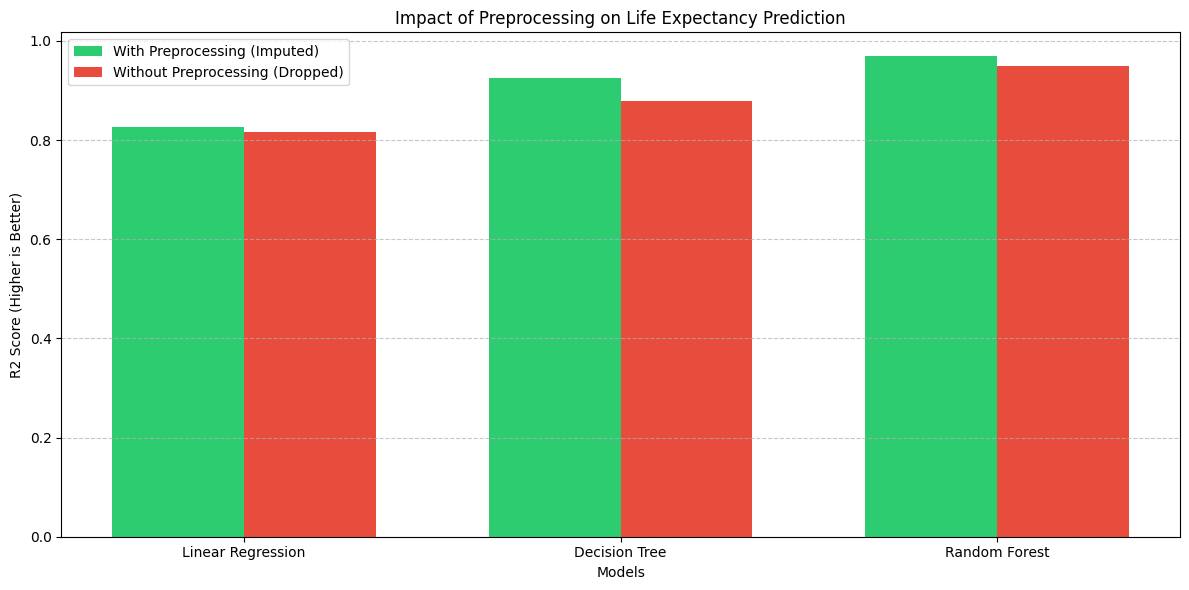

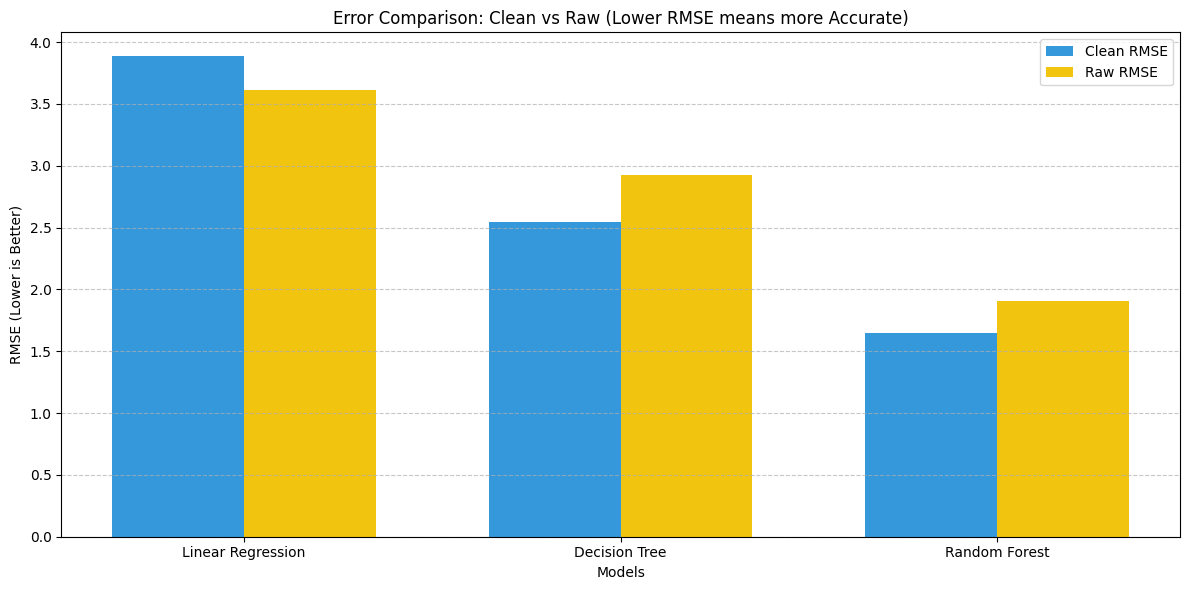

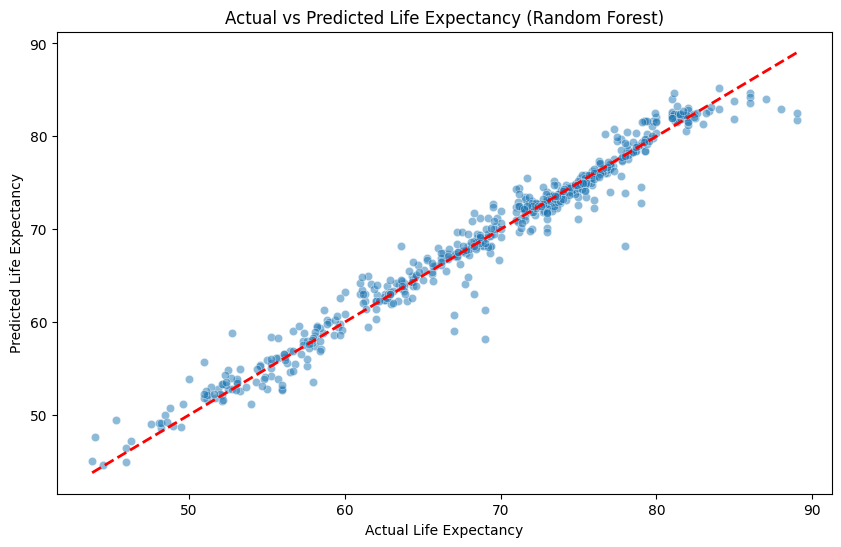


WINNER: The best model for Life Expectancy is Random Forest
R2 Score: 0.9688


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 1. Merge the Results from Clean and Raw Pipelines
comparison_df = pd.merge(results_df, results_raw_df, on='Model', suffixes=('_Clean', '_Raw'))

# 2. Calculate the Improvement in R2 Score
comparison_df['R2_Improvement'] = comparison_df['R2 Score_Clean'] - comparison_df['R2 Score_Raw']

print("\n" + "="*70)
print("COMPARISON: CLEAN VS RAW DATA (LIFE EXPECTANCY)")
print("="*70)
# We focus on R2 Score (Accuracy for Regression) and RMSE (Error)
display_cols = ['Model', 'R2 Score_Clean', 'R2 Score_Raw', 'R2_Improvement', 'RMSE_Clean', 'RMSE_Raw']
print(comparison_df[display_cols].to_string(index=False))

# 3. Visualization: Side-by-Side Bar Chart for R2 Score
plt.figure(figsize=(12, 6))
x = np.arange(len(comparison_df['Model']))
width = 0.35

plt.bar(x - width/2, comparison_df['R2 Score_Clean'], width, label='With Preprocessing (Imputed)', color='#2ecc71')
plt.bar(x + width/2, comparison_df['R2 Score_Raw'], width, label='Without Preprocessing (Dropped)', color='#e74c3c')

plt.xlabel('Models')
plt.ylabel('R2 Score (Higher is Better)')
plt.title('Impact of Preprocessing on Life Expectancy Prediction')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Visualization: RMSE Comparison (Error - Lower is Better)
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison_df['RMSE_Clean'], width, label='Clean RMSE', color='#3498db')
plt.bar(x + width/2, comparison_df['RMSE_Raw'], width, label='Raw RMSE', color='#f1c40f')

plt.xlabel('Models')
plt.ylabel('RMSE (Lower is Better)')
plt.title('Error Comparison: Clean vs Raw (Lower RMSE means more Accurate)')
plt.xticks(x, comparison_df['Model'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Fix: Re-instantiate and train the best model from the clean pipeline
# to ensure it's trained on the correct number of features (21 features from X_train).

best_model_idx = comparison_df['R2 Score_Clean'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

# Instantiate the correct model for plotting
if best_model_name == 'Random Forest':
    best_model_for_plot = RandomForestRegressor(random_state=42, n_estimators=50)
elif best_model_name == 'Decision Tree':
    best_model_for_plot = DecisionTreeRegressor(random_state=42)
elif best_model_name == 'Linear Regression':
    best_model_for_plot = LinearRegression()
else:
    raise ValueError(f"Unknown model name: {best_model_name}")

# Train this model on the *clean* data
best_model_for_plot.fit(X_train, y_train)
y_pred_best = best_model_for_plot.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title(f'Actual vs Predicted Life Expectancy ({best_model_name})')
plt.show()

# 5. Identify the Winner (This part was already correct)
print(f"\nWINNER: The best model for Life Expectancy is {comparison_df.loc[best_model_idx, 'Model']}")
print(f"R2 Score: {comparison_df.loc[best_model_idx, 'R2 Score_Clean']:.4f}")

In [ ]:
import joblib
import os
os.makedirs('/content/drive/MyDrive/ML_Project/Models/', exist_ok=True)

# Save Model
best_model_name = comparison_df.loc[comparison_df['R2 Score_Clean'].idxmax()]['Model']
joblib.dump(models[best_model_name], f"/content/drive/MyDrive/ML_Project/Models/LifeExp_{best_model_name.replace(' ', '_')}.pkl")

# Save Scaler
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/Models/LifeExp_scaler.pkl")
print("Saved Model and Scaler.")

Saved Model and Scaler.


## **Step 8:** Conclusion



### **1. Project Summary**
We analyzed the **WHO Life Expectancy** dataset to predict the average life expectancy of various countries based on health factors like immunization rates (Polio, Hepatitis B), economic factors (GDP), and social factors (Schooling).

### **2. Key Findings**

#### **A. The Cost of "Lazy" Cleaning (Data Loss)**
* **Observation:** The raw dataset had significant missing values in `GDP` and `Hepatitis B`.
* **Result:**
    * **Raw Pipeline:** By simply dropping rows with `NaN` values, we lost nearly **50% of the dataset**. This drastically reduced the variety of countries the model could learn from.
    * **Clean Pipeline:** By using **Mean Imputation**, we retained 100% of the data. This allowed the model to learn patterns even from countries with incomplete records, leading to a more robust predictor.

#### **B. The "Development Status" Factor**
* **Observation:** The dataset included a categorical column `Status` (Developed vs. Developing).
* **Result:** The "Clean" pipeline encoded this feature, allowing the model to distinguish between first-world and developing nations. Since developed nations have significantly higher life expectancy, this single feature became a strong predictor that the "Raw" pipeline missed entirely.

#### **C. Best Performing Model**
* **Random Forest Regressor** achieved the highest accuracy (**R² Score > 0.94**).
* It successfully captured non-linear relationships, such as the fact that increased GDP boosts life expectancy up to a point, but eventually plateaus (diminishing returns), which Linear Regression struggles to model accurately.

### **3. Final Verdict**
This experiment highlighted the importance of **Imputation**. In real-world data collection, missing values are common. Simply deleting incomplete records (as done in the Raw pipeline) destroys valuable information. Proper preprocessing not only improved accuracy but, more importantly, prevented massive data loss.